In [10]:
import pandas as pd
import numpy as np
import os
from scipy.stats import chi2

Import flirpy (1st run: install flirpy from github via pip)

In [11]:
# Modified flirpy version, in https://github.com/LJMUAstroecology/flirpy/blob/master/flirpy/io/seq.py 
# Zeile 184:
# frame = Fff(chunk) --> Fff(chunk, width = self.width, height=self.height)
import flirpy as fl
from flirpy.io.seq import splitter

### Define directories to work in

In [12]:
# define path to directory with test data
data_dir = os.getcwd() + "\\..\\test\\"

In [13]:
directories=[d for d in os.listdir(data_dir ) if os.path.isdir(data_dir + d)]

In [14]:
# ignore folders
ignore = []
directories = [s for s in directories if s not in ignore]

### Unpack seq-files recorded with infrared camera

In [16]:
for i in directories:
    subdir=[d for d in os.listdir(data_dir+"\\"+i) if os.path.isdir(data_dir + "\\" +i+"\\"+d)]
    for j in subdir:
        files = os.listdir(data_dir+"\\"+i+"\\"+j)
        files =  [data_dir+"\\"+i+"\\"+j+"\\"+f for f in files if f[-3:]=='seq']
        
        # Only choose .seq files for extraction, which have not an equally named folder already
        folders_already_done = [s for s in os.listdir(data_dir + "\\"+i+"\\"+j) if os.path.isdir(data_dir + "\\"+ i+"\\"+j+"\\"+s)]
        folders_already_done =  [data_dir + "\\"+ i+"\\"+j+"\\"+f for f in folders_already_done]
        files = [ f for f in files if f[:-4] not in folders_already_done]
        
        d = splitter(width=640, height=480,  output_folder=data_dir +"\\"+i+"\\"+j+"\\")
        d.process(list(files));

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15


### Run loop to calculate characteristic values (e.g. max, min, left and right boundary and std and mean on the side of left and right boundary) of each temperature profile

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [18]:
from flirpy.io.fff import Fff
from flirpy.util.exiftool import Exiftool

Define variables used in the loop

In [19]:
# y-pixel value taken for caluclation, if no other value defined
default_value = 350
count = 0
# size of smoothing window [x-pixel]
window_size = 10
# size of shift to calculate minimum and maximum slope [x-pixel]
shift_size = 24
# number of maximal x-pixels used to calculate the mean and std right and left of the temperature peak in the profile
n_pixels = 100
# define outgoing direction as unknown initially
outgoing = 0
# define maximal possible bandwith for calculation [x-pixel]
bandwidth_max = 220
# define minimal  possible bandwith for calculation [x-pixel]
bandwidth_min = 10
# number of images included for the determination of the turning point
turn_count = 15
# factor that the weighted mean between the Mean (2x) and STD (1x) ratio between right and left must exceed
factor_to_turn = 1.4
# define upper threshold of x-pixel value considered for calculation
up_thres = 640

In [20]:
#
def read_coordinates_of_line(filename, path, previous_coordinates):
    """
    Function to check if excel with line definition exists.
    :param filename: Filename of excel which contains two coordinates (x,y) which define a straight line for temperature profile
    :param path: path to the above file
    :param defaul_wert: either default_value defined globally or if already defined, than coordinates from previous function call
    """
    try:
        coordinates = pd.read_excel(path + "\\" + filename)
        if np.isnan(coordinates.iloc[1][1]):
            coordinates = int(coordinates.iloc[0,0])
        else:
            coordinates = coordinates.astype(int)
        print(coordinates)
    except Exception as e:
        coordinates = previous_coordinates
    return coordinates


   coordinates_y  coordinates_x
0             20             73
1             20            113
D:\von Delfin2\Upload\src\..\test\\Data_example\Measurement_example_Jan2021\Rec-AP-000120-294_10_14_01_719


C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15


-1


C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp = PB/np.log(PR1/(PR2*(raw+PO))+PF)-273.15
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nadin\Anaconda3\lib\site-packages\flirpy\util\raw.py:59: RuntimeWarning: invalid value encountered in log
  temp 

D:\von Delfin2\Upload\src\..\test\\Data_example\Measurement_example_Jan2021\Rec-AP-000120-294_10_14_01_719\output_line_s_24_w_10.xlsx


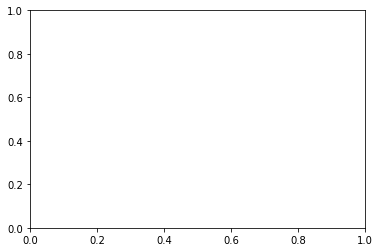

In [21]:
# dependend on foulder structure and used levels, search for excel with name "coordinates" on highest level. "coordinates" contains two coordinates (x and y) discribing the straight line, on which the temperature profile is used for calculation
# here given for three levels, starting in the foulder where the used data set is located
coordinates = read_coordinates_of_line("coordinates.xlsx", data_dir, default_value)
for i in directories:
    # search for excel with coordinates on highest level
    coordinates2 = read_coordinates_of_line("coordinates.xlsx", data_dir + "\\" + i, coordinates)
    subdir=[d for d in os.listdir(data_dir+"\\"+i) if os.path.isdir(data_dir + "\\" + i+"\\"+d)]
    for j in subdir:
        # search for excel with coordinates on highest level
        coordinates3 = read_coordinates_of_line("coordinates.xlsx", data_dir + "\\" + i + "\\" + j, coordinates2)
        files = os.listdir(data_dir+"\\"+i+"\\"+j)
        files =  [data_dir + "\\" +  i+"\\"+j+"\\"+f for f in files if f[-3:]=='seq']        
        # choose files 
        folders_already_done = [s for s in os.listdir(data_dir +"\\"+i+"\\"+j) if os.path.isdir(data_dir + "\\" + i+"\\"+j+"\\"+s)]
        folders_already_done =  [data_dir + "\\" + i+"\\"+j+"\\"+f for f in folders_already_done]
        files = [ f for f in files if f[:-4] in folders_already_done]
        previous_stds = [] # list to save the last (at max 15) differences between left and right std
        outgoing = 0
        for l in files:
            # search for excel with coordinates on highest level
            coordinates4 = read_coordinates_of_line("coordinates.xlsx", l[:-4], coordinates3)
            print(l[:-4])
            output = pd.DataFrame(columns=["framenr", "max", "min", "left_boundary", "right_boundary", "mean_left", "std_left", "mean_right", "std_right", "left_pixels", "left_boundary_mod", "right_pixels", "right_boundary_mod", "mean_right_error", "std_right_error", "mean_left_error", "std_left_error", "outgoing", "bandwidth_mod", "center_mean", "center_std"])
            files2 = os.listdir( l[:-4] + "\\raw\\")
            files2 = [f for f in files2 if f[-4:] == ".fff"]
            count = 0
            outgoing = 0            
            
            try:
                name = ""
                if type(coordinates4) == int:
                    os.mkdir( l[:-4] + "\\Images_" + str(coordinates4) + "_s_" + str(shift_size) + "_w_"+ str(window_size))
                    name = str(coordinates4)
                else:
                    os.mkdir( l[:-4] + "\\Images_" + "line" + "_s_" + str(shift_size) + "_w_"+ str(window_size))
                    name = "line"
                indxs = -1
                just_flipped = 10
                
                while indxs < len(files2)-1:
                    just_flipped += 1
                    cont = True
                    indxs += 1
                    # for s in files2:
                    s = files2[indxs]
                    f = Fff( l[:-4] + "\\raw\\" +s, width=640, height=480)
                    exiftool = Exiftool()
                    meta = exiftool.meta_from_file( l[:-4] + "\\raw\\" + s[:-4] + ".txt")
                    single_image = f.get_radiometric_image(meta)

                    if type(coordinates4) == int:
                        df = pd.DataFrame(single_image[coordinates4] [:up_thres], columns=["temp"])
                    else:
                        df = pd.DataFrame()
                        # calculate the entries for the straight line, described by the values in "coordinates" in the images
                        for o in range(len(single_image[0][:up_thres])):
                            y1 = coordinates4.loc[0, "coordinates_y"]
                            y2 = coordinates4.loc[1, "coordinates_y"]
                            x1 = coordinates4.loc[0, "coordinates_x"]
                            x2 = coordinates4.loc[1, "coordinates_x"]
                            b = y2 - (y2-y1)/(x2-x1)*x2*1.0
                            m = (y2-y1)/(x2-x1)*1.0
                            y = m*o+b
                            if (y >= 0) & (o >= 0) & (o < up_thres) & (np.ceil(y) < 480):
                                wert = (single_image[int(np.floor(y))][o]*(1-(y-np.floor(y))) + single_image[int(np.ceil(y))][o]*(1-(np.ceil(y)-y)))
                            else:
                                wert = np.nan
                            if y == np.floor(y):
                                wert /= 2.0
                            df = df.append([wert])
                        df = df.rename(columns={0:"temp"})
                        df = df.reset_index(drop=True)
                    

                    # determination of characteristic values in the temperature profile
                    if outgoing == 0:
                        # define maximal temperature in the temperature profile of the straight line
                        max = df["temp"].max()
                        # determination of values close to the start of the flanks of the peak in the temperature profile
                        # 1.2 is an empirically determined value
                        df["int"] = df["temp"].rolling(window=window_size).mean()
                        df["int_shift"] = df["int"].shift(shift_size)
                        df["int_diff"] = df["int"] / df["int_shift"]
                        
                        maxdiff = int(df["int_diff"].idxmax()-shift_size*1.2)
                        mindiff = df["int_diff"].idxmin()

                        # define x-pixel of n_pixels=100 pixel to the right or left (or what is available) with regard to maxdiff or mindiff
                        right_upper_boarder = np.min([mindiff+n_pixels, up_thres])
                        left_lower_boarder = np.max([0, maxdiff-n_pixels])

                        # determine mean temperature value and its standard deviation within the previously defined max 100 pixel wide range
                        # careful: right_var and left_var are standard dev. not variance
                        left_mean = df.loc[left_lower_boarder:maxdiff, "temp"].mean()
                        left_var = df.loc[left_lower_boarder:maxdiff, "temp"].std()

                        right_mean = df.loc[mindiff:right_upper_boarder, "temp"].mean()
                        right_var = df.loc[mindiff:right_upper_boarder, "temp"].std()

                        # define initial ingoing and outgoing direction with respect to the movement of the temperature peak (from warm to cold9, -1 if outgoing is right, 1 if left
                        outgoing = np.argmin([left_mean, right_mean])*2-1
                        print(outgoing)
                        
                    # flipp images if necessary and determine values as stated above    
                    if len(previous_stds)>2:
                        
                        if len([i  for i in previous_stds if i >= factor_to_turn ])*1.0/len(previous_stds) > 0.8:
                            if just_flipped > 2:
                                outgoing *= -1
                                previous_stds = list((1)/np.array(previous_stds))
                                indxs = np.max([indxs-16,0])
                                output = output.iloc[:-15]
                                count = np.max([count-15,0])
                                cont = False
                                just_flipped = 0
                            
                    
                    if cont:
                        if outgoing == -1:
                            df["temp"] = df["temp"].iloc[::-1].values
                            df = df.reset_index(drop=True)

                        
                        max_pos = df["temp"].idxmax()
                        
                        max = df["temp"].max()
                        df["int"] = df["temp"].rolling(window=window_size).mean()
                        df["int_shift"] = df["int"].shift(shift_size)
                        df["int_diff"] = df["int"] / df["int_shift"]                    

                        # turn min and max depending on incoming and outgoing edge
                        # mindiff -> Flank towards cooler ground
                        # maxdiff -> Flank towards warmer ground
                        mindiff = df.loc[:max_pos+bandwidth_max, "int_diff"].idxmin()
                        if df.loc[mindiff-bandwidth_max:mindiff-bandwidth_min, "int_diff"].shape[0]==0:
                            continue
                        maxdiff = int(df.loc[mindiff-bandwidth_max:mindiff-bandwidth_min, "int_diff"].idxmax()-shift_size*1.2)
                        if maxdiff > max_pos:
                            continue

                        # define x-pixel of n_pixels=100 pixel to the right or left (or what is available) with regard to maxdiff or mindiff
                        right_upper_boarder = np.min([mindiff+n_pixels, up_thres])
                        left_lower_boarder = np.max([0, maxdiff-n_pixels])

                        # determine mean temperature value and its standard deviation within the previously defined max 100 pixel wide range
                        # careful: right_var and left_var are standard dev. not variance
                        left_mean = df.loc[left_lower_boarder:maxdiff, "temp"].mean()
                        left_var = df.loc[left_lower_boarder:maxdiff, "temp"].std()

                        right_mean = df.loc[mindiff:right_upper_boarder, "temp"].mean()
                        right_var = df.loc[mindiff:right_upper_boarder, "temp"].std()
                        
                        # calculate conservative bandwith, starting from mindiff and maxdiff and finding the spot at each flank at one thrid between the mean value and max. temperature (1/3 is empirically determined)
                        # mindiff_mod -> conservative flanke towards cooler ground
                        # maxdiff_mod -> constervative flanke towards warmer ground
                        # min_temp = (max+left_mean)*1.0/2.0
                        min_temp = (max-left_mean)/3.0+left_mean
                        df["int_shift"] = df["int"].shift()
                        temp = df.loc[((df["int"] >= min_temp) &  (df["int_shift"] <= min_temp))]
                        # interpolate between pixels
                        temp["pixels"] = temp.index - (temp["int"]-min_temp).abs()*1.0/(temp["int_shift"]-temp["int"]).abs()
                        if temp.loc[temp["pixels"] >= maxdiff, "pixels"].shape[0] == 0:
                            continue
                        maxdiff_mod = temp.loc[temp["pixels"] >= maxdiff, "pixels"].iloc[0]
                        if maxdiff_mod > max_pos:
                            continue

                        # max_temp = (max+right_mean)*1.0/2.0
                        max_temp = (max-right_mean)/3.0+right_mean
                        df["int_shift"] = df["int"].shift(-1)
                        temp = df.loc[((df["int"] >= max_temp) &  (df["int_shift"] <= max_temp))]
                        # interpolate between pixels
                        temp["pixels"] = temp.index + (temp["int"]-max_temp).abs()*1.0/(temp["int_shift"]-temp["int"]).abs()
                        if temp.loc[temp["pixels"] <= mindiff, "pixels"].shape[0] == 0:
                            continue
                        mindiff_mod = temp.loc[temp["pixels"] <= mindiff, "pixels"].iloc[-1]
                        if mindiff_mod < max_pos:
                            continue
                        
                        # calculate the mean and standard deviation between mindiff_mod and maxdiff_mod (printed as red lines)
                        mean_middle = df.loc[np.ceil(maxdiff_mod):np.floor(mindiff_mod), "int"].mean()
                        std_middle = df.loc[np.ceil(maxdiff_mod):np.floor(mindiff_mod), "int"].std()
                        middle = mindiff_mod - maxdiff_mod
                        
                        previous_stds.append((right_var/left_var+right_mean/left_mean*2)/3)
                        previous_stds = previous_stds[(-1)*turn_count:]

                        # determine amound of pixels used left and right of the peak
                        left_pixels = maxdiff-left_lower_boarder
                        right_pixels = right_upper_boarder-mindiff 

                        # calculate uncorrelated (approximation) standard error on mean and standard deviation
                        # the error on the standard deviation (http://www.milefoot.com/math/stat/ciA<-variances.htm) is symetrized5
                        # assumed: gauss distribution of the values, no connection of mean and std-deviation
                        right_mean_err = right_var/(right_pixels-1)
                        # 0.16 because of one sigma = 68% of points and (1-0.68)/2 is 0.16 (see link above)
                        right_var_error = (np.sqrt(pow(right_var,2)*(right_pixels-1)/chi2.ppf(0.16,right_pixels-1))-np.sqrt(pow(right_var,2)*(right_pixels-1)/chi2.ppf(0.84,right_pixels-1)))/2

                        left_mean_err = left_var/(left_pixels-1)
                        # 0.16 because of one sigma = 68% of points and (1-0.68)/2 is 0.16 (see link above)
                        left_var_error = (np.sqrt(pow(left_var,2)*(left_pixels-1)/chi2.ppf(0.16,left_pixels-1))-np.sqrt(pow(left_var,2)*(left_pixels-1)/chi2.ppf(0.84,left_pixels-1)))/2
                        output.loc[count] = np.nan

                        output.iloc[count]["bandwidth_mod"] = middle
                        output.iloc[count]["center_mean"] = mean_middle
                        output.iloc[count]["center_std"] = std_middle
                        output.iloc[count]["framenr"] = s[:-4]
                        output.iloc[count]["max"] = df["temp"].max()
                        output.iloc[count]["min"] = df["temp"].min()
                        output.iloc[count]["left_boundary"] = maxdiff
                        output.iloc[count]["right_boundary"] = mindiff
                        output.iloc[count]["mean_left"] = left_mean
                        output.iloc[count]["std_left"] = left_var
                        output.iloc[count]["mean_right"] = right_mean
                        output.iloc[count]["std_right"] = right_var
                        output.iloc[count]["left_pixels"] = left_pixels
                        output.iloc[count]["right_pixels"] = right_pixels  
                        output.iloc[count]["left_boundary_mod"] = maxdiff_mod
                        output.iloc[count]["right_boundary_mod"] = mindiff_mod
                        output.iloc[count]["mean_right_error"] = right_mean_err
                        output.iloc[count]["std_right_error"] = right_var_error
                        output.iloc[count]["mean_left_error"] = left_mean_err    
                        output.iloc[count]["std_left_error"] = left_var_error   
                        output.iloc[count]["outgoing"] = outgoing #1 -> to the right, -1 -> to the left


                        # create plot of the temperature profile of each frame in the video including marks for charateristic values (e.g. max. temperature, intersection of flanks at 1/3 and correlating x-pixel)
                        # plot all profiles in the same "outgoing" direction and mark flipped images
                        sns.lineplot(df.index, df["temp"], color="lightblue")
                        plt.xlabel("Pixel number")
                        plt.ylabel("Temperature in °C")

                        plt.plot([df.index.min()-5, df.index.max()+5], [min_temp, min_temp], linewidth=1, color='r')
                        plt.plot([df.index.min()-5, df.index.max()+5], [max_temp, max_temp], linewidth=1, color='r')
                        plt.plot([maxdiff_mod,maxdiff_mod], [ df["temp"].min()-1, df["temp"].max()+1], linewidth=1, color='r')
                        plt.plot([mindiff_mod,mindiff_mod], [ df["temp"].min()-1, df["temp"].max()+1], linewidth=1, color='r')
                        
                        plt.plot([df.index.min()-5, df.index.max()+5], [max, max], linewidth=2)
                        plt.plot([mindiff,mindiff], [ df["temp"].min()-1, df["temp"].max()+1], linewidth=2)
                        plt.plot([maxdiff,maxdiff], [df["temp"].min()-1, df["temp"].max()+1], linewidth=2)

                        plt.plot([left_lower_boarder, maxdiff], [left_mean, left_mean], linewidth=2, color="black")
                        plt.plot([left_lower_boarder, maxdiff], [left_mean+left_var, left_mean+left_var], linewidth=2, color="grey")
                        plt.plot([left_lower_boarder, maxdiff], [left_mean-left_var, left_mean-left_var], linewidth=2, color="grey")
                        
                        plt.plot([mindiff, right_upper_boarder], [right_mean, right_mean], linewidth=2, color="black")
                        plt.plot([mindiff, right_upper_boarder], [right_mean+right_var, right_mean+right_var], linewidth=2, color="grey")
                        plt.plot([mindiff, right_upper_boarder], [right_mean-right_var, right_mean-right_var], linewidth=2, color="grey")

                        if outgoing == -1:
                            plt.text(20,df["temp"].min()-0.3, "Image flipped", bbox=dict(fill=False, edgecolor='red', linewidth=2))

                        plt.savefig( l[:-4] + "\\Images_" + name + "_s_" + str(shift_size) + "_w_"+ str(window_size) + "\\" + s[:-4] +".png")
                        plt.cla()
                        count += 1
                print( l[:-4] + "\\output_" + name + "_s_" + str(shift_size) + "_w_"+ str(window_size) + ".xlsx")
                output.to_excel( l[:-4] + "\\output_" + name + "_s_" + str(shift_size) + "_w_"+ str(window_size) + ".xlsx")
            except:
                pass

            

